In [1]:
! pip install -q langdetect
! pip install matplotlib

In [2]:
import pandas as pd
from tqdm import tqdm
from langdetect import detect

In [3]:


textos = [
    "Hello, how are you?",
    "Bonjour, comment ça va?",
    "Hola, ¿cómo estás?",
    "Привет, как дела?"
]

for i, texto in enumerate(textos, start=1):
    language = detect(texto)
    print(f"Texto {i}: {language}")


Texto 1: en
Texto 2: fr
Texto 3: es
Texto 4: mk


In [4]:
def detect_language(text: str):
    return detect(text)

In [5]:
# Carregar o modelo em inglês
FILE_PATH = "D:/tcc2/guilherme/1webscrapper/data/reviews_scraper_original.csv"
df = pd.read_csv(FILE_PATH) 
df = df['review']

In [6]:
texto = "I love you"

lista_languages_df = df.apply(detect_language)


In [11]:
lista_languages_df.value_counts()

review
en    44438
es        3
af        2
tl        2
nl        1
ro        1
fr        1
tr        1
hu        1
et        1
sl        1
Name: count, dtype: int64

In [10]:
len(lista_languages_df.value_counts())

11

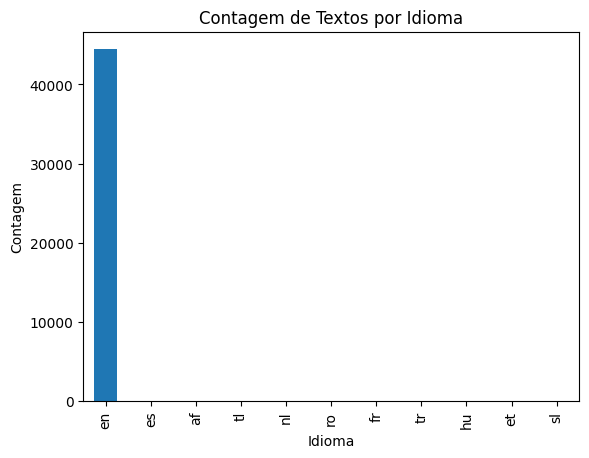

In [8]:
import matplotlib.pyplot as plt

# Suponha que 'lista_languages_df' seja um DataFrame do pandas com uma coluna 'value_counts()'
# Se 'lista_languages_df' não for um DataFrame, você pode primeiro convertê-lo em um DataFrame pandas
# usando algo como pd.DataFrame(lista_languages_df)

# Use 'value_counts()' para contar a ocorrência de cada idioma na lista
contagem_idiomas = lista_languages_df.value_counts()

# Crie um gráfico de barras
contagem_idiomas.plot(kind='bar')

# Adicione rótulos e título
plt.xlabel('Idioma')
plt.ylabel('Contagem')
plt.title('Contagem de Textos por Idioma')

# Exiba o gráfico
plt.show()


In [9]:
import spacy
from spacy_langdetect import LanguageDetector

# Carrega o modelo de linguagem em inglês
nlp = spacy.load("en_core_web_sm")

# Inicializa o detector de idioma
language_detector = LanguageDetector()

# Adiciona o detector de idioma ao pipeline do spaCy
nlp.add_pipe(language_detector, name="language_detector", last=True)

def detect_language(text):
    doc = nlp(text)
    return doc._.language['language']

texto = "Insira aqui o texto que você deseja identificar a linguagem."

linguagem = detect_language(texto)
print("A linguagem do texto é:", linguagem)


ValueError: [E966] `nlp.add_pipe` now takes the string name of the registered component factory, not a callable component. Expected string, but got <spacy_langdetect.spacy_langdetect.LanguageDetector object at 0x0000025A6569F6A0> (name: 'language_detector').

- If you created your component with `nlp.create_pipe('name')`: remove nlp.create_pipe and call `nlp.add_pipe('name')` instead.

- If you passed in a component like `TextCategorizer()`: call `nlp.add_pipe` with the string name instead, e.g. `nlp.add_pipe('textcat')`.

- If you're using a custom component: Add the decorator `@Language.component` (for function components) or `@Language.factory` (for class components / factories) to your custom component and assign it a name, e.g. `@Language.component('your_name')`. You can then run `nlp.add_pipe('your_name')` to add it to the pipeline.